In [2]:
import pandas as pd 
from datetime import datetime 
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint


In [3]:
merged = pd.read_csv(r'C:\Users\jerin\Downloads\lbnlbldg59\lbnlbldg59\lbnlbldg59.processed\LBNLBLDG59\clean_Bldg59_2018to2020\clean data\long_merge.csv')

zone = "47"

if zone in ["36", "37", "38", "39", "40", "41", "42", "64", "65", "66", "67", "68", "69", "70"]:
    rtu = "rtu_001"
    wing = "hvac_N"
elif zone in ["18", "25", "26", "45", "48", "55", "56", "61"]:
    rtu = "rtu_003"
    wing = "hvac_S"
elif zone in ["16", "17", "21", "22", "23", "24", "46", "47", "51", "52", "53", "54"]:
    rtu = "rtu_004"
    wing = "hvac_S"
else:
    rtu = "rtu_002"
    wing = "hvac_N"
#merged is the dataframe
sorted = merged[["date"]+[col for col in merged.columns if zone in col or rtu in col or wing in col]+["hp_hws_temp", "aru_001_cwr_temp" , "aru_001_cws_fr_gpm" ,"aru_001_cws_temp","aru_001_hwr_temp" ,"aru_001_hws_fr_gpm" ,"aru_001_hws_temp"]]
sorted

date  zone_047_hw_valve  rtu_004_sat_sp_tn  \
0        2018-01-01 00:00:00              100.0               69.0   
1        2018-01-01 00:01:00              100.0               69.0   
2        2018-01-01 00:02:00              100.0               69.0   
3        2018-01-01 00:03:00              100.0               69.0   
4        2018-01-01 00:04:00              100.0               69.0   
...                      ...                ...                ...   
2072149  2020-12-31 23:58:00              100.0               68.0   
2072150  2020-12-31 23:58:00              100.0               68.0   
2072151  2020-12-31 23:59:00              100.0               68.0   
2072152  2020-12-31 23:59:00              100.0               68.0   
2072153  2021-01-01 00:00:00              100.0               68.0   

         zone_047_temp  zone_047_fan_spd  rtu_004_fltrd_sa_flow_tn  \
0                 67.5              20.0                  9265.604   
1                 67.5              20.0                  9265.604   
2                 67.5              20.0                  9708.240   
3                 67.5              20.0                  9611.638   
4                 67.5              20.0                  9215.110   
...                ...               ...                       ...   
2072149           63.2              20.0                 18884.834   
2072150           63.2              20.0                 18884.834   
2072151           63.2              20.0                 19345.508   
2072152           63.2              20.0                 19345.508   
2072153           63.2              20.0                 18650.232   

         rtu_004_sa_temp  rtu_004_pa_static_stpt_tn  rtu_004_oa_flow_tn  \
0                   66.1                       0.06            0.000000   
1                   66.0                       0.06         6572.099162   
2                   66.1                       0.06         7628.832542   
3                   66.1                       0.06         7710.294617   
4                   66.0                       0.06         7139.184090   
...                  ...                        ...                 ...   
2072149             64.4                       0.06         2938.320000   
2072150             64.4                       0.06         2938.320000   
2072151             64.3                       0.06         3154.390000   
2072152             64.3                       0.06         3154.390000   
2072153             64.1                       0.06         3076.270000   

         rtu_004_oadmpr_pct  ...  zone_047_heating_sp  Unnamed: 47_y  \
0                      28.0  ...                  NaN            NaN   
1                      28.0  ...                  NaN            NaN   
2                      28.0  ...                  NaN            NaN   
3                      28.0  ...                  NaN            NaN   
4                      28.0  ...                  NaN            NaN   
...                     ...  ...                  ...            ...   
2072149                23.4  ...                 71.0           69.0   
2072150                23.4  ...                 71.0           69.0   
2072151                23.4  ...                 71.0           69.0   
2072152                23.4  ...                 71.0           69.0   
2072153                22.9  ...                 71.0           69.0   

            hvac_S  hp_hws_temp  aru_001_cwr_temp  aru_001_cws_fr_gpm  \
0              NaN         75.3               NaN                 NaN   
1              NaN         75.3               NaN                 NaN   
2              NaN         75.3               NaN                 NaN   
3              NaN         75.3               NaN                 NaN   
4              NaN         75.3               NaN                 NaN   
...            ...          ...               ...                 ...   
2072149  23.145000        123.8             56.25               5

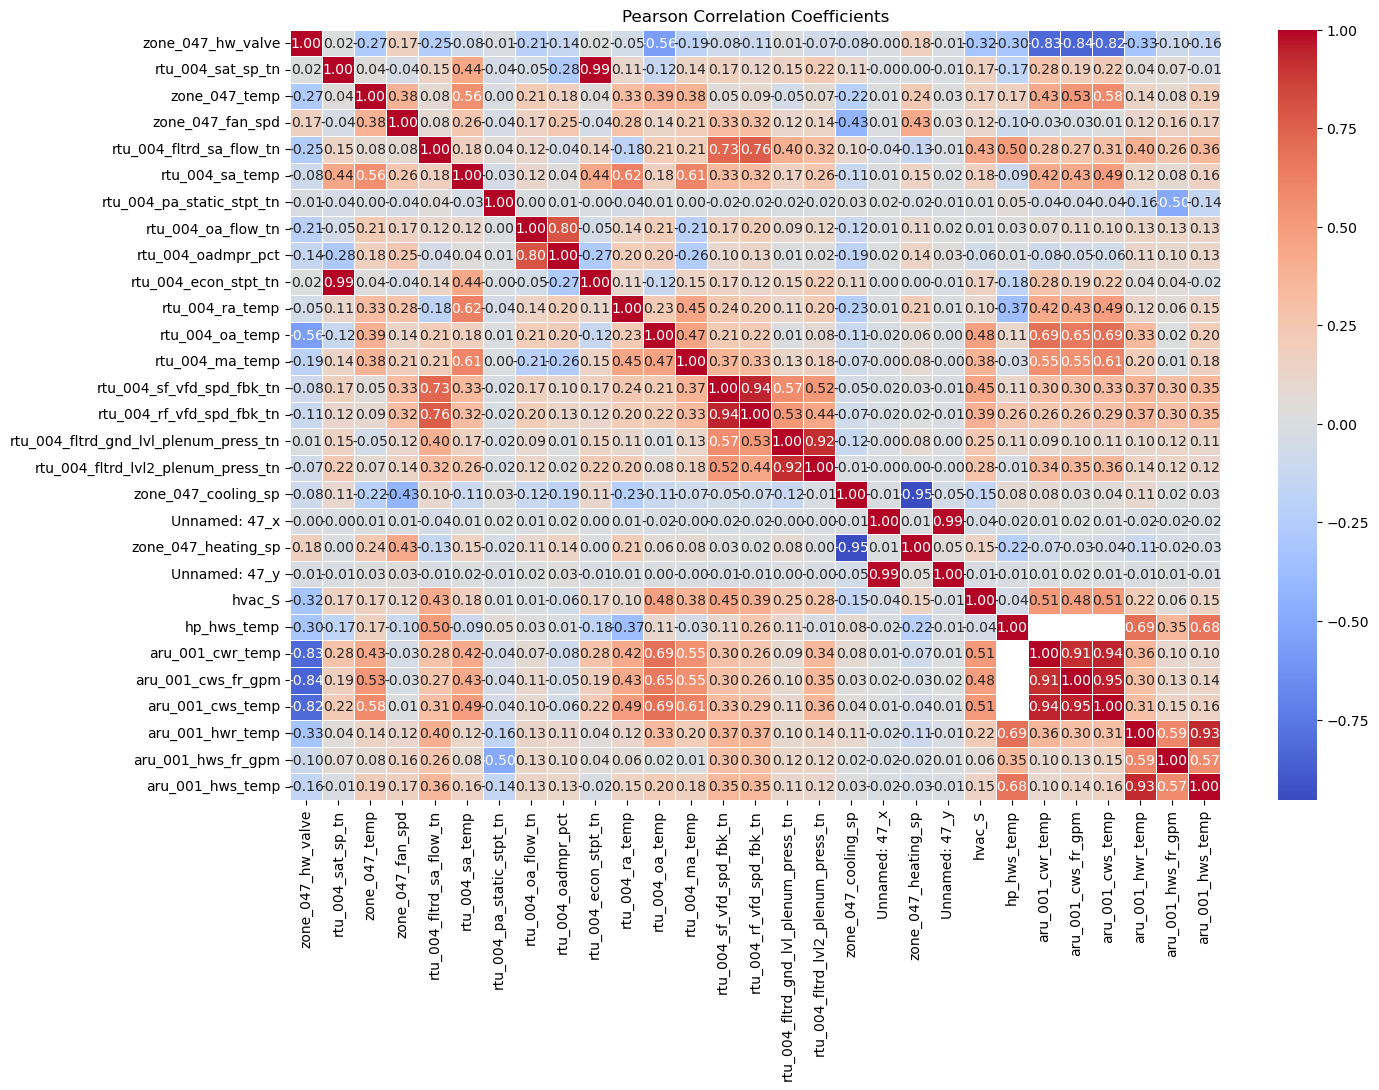

In [3]:
correlation_matrix = sorted.loc[:, sorted.columns != 'date'].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Coefficients')
plt.show()

In [4]:
highly_correlated_cols = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.3:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            if (colname_i != colname_j) and (colname_i=="zone_047_temp" or colname_j=="zone_047_temp" or colname_i=="hvac_S" or colname_j=="hvac_S"):
                print(colname_i,"----",abs(correlation_matrix.iloc[i, j]),"----",colname_j)
                highly_correlated_cols.add(colname_i)
                highly_correlated_cols.add(colname_j)
                
            

zone_047_fan_spd ---- 0.3838842710385038 ---- zone_047_temp
rtu_004_sa_temp ---- 0.5636316174287519 ---- zone_047_temp
rtu_004_ra_temp ---- 0.32776265464886917 ---- zone_047_temp
rtu_004_oa_temp ---- 0.3911499150089511 ---- zone_047_temp
rtu_004_ma_temp ---- 0.3800818291020465 ---- zone_047_temp
hvac_S ---- 0.3163506114497974 ---- zone_047_hw_valve
hvac_S ---- 0.42500326788919984 ---- rtu_004_fltrd_sa_flow_tn
hvac_S ---- 0.4794994590105312 ---- rtu_004_oa_temp
hvac_S ---- 0.37653522078249596 ---- rtu_004_ma_temp
hvac_S ---- 0.45054590590454646 ---- rtu_004_sf_vfd_spd_fbk_tn
hvac_S ---- 0.3910776435479394 ---- rtu_004_rf_vfd_spd_fbk_tn
aru_001_cwr_temp ---- 0.4337890009515319 ---- zone_047_temp
aru_001_cwr_temp ---- 0.5103744910713975 ---- hvac_S
aru_001_cws_fr_gpm ---- 0.5251959795850137 ---- zone_047_temp
aru_001_cws_fr_gpm ---- 0.4816297584385553 ---- hvac_S
aru_001_cws_temp ---- 0.576461860142355 ---- zone_047_temp
aru_001_cws_temp ---- 0.5060071970556257 ---- hvac_S


In [4]:
final_df = sorted.copy()
final_df['date'] = pd.to_datetime(final_df['date'], format = "%Y-%m-%d %H:%M:%S")
final_df = final_df[ (final_df.date.dt.date >date(2019, 4, 1)) & (final_df.date.dt.date< date(2020, 2, 15))]
final_df.isna().sum()

date                                          0
zone_047_hw_valve                             0
rtu_004_sat_sp_tn                             0
zone_047_temp                                 0
zone_047_fan_spd                              0
rtu_004_fltrd_sa_flow_tn                      0
rtu_004_sa_temp                               0
rtu_004_pa_static_stpt_tn                     0
rtu_004_oa_flow_tn                            0
rtu_004_oadmpr_pct                            0
rtu_004_econ_stpt_tn                          0
rtu_004_ra_temp                               0
rtu_004_oa_temp                               0
rtu_004_ma_temp                               0
rtu_004_sf_vfd_spd_fbk_tn                     0
rtu_004_rf_vfd_spd_fbk_tn                     0
rtu_004_fltrd_gnd_lvl_plenum_press_tn         0
rtu_004_fltrd_lvl2_plenum_press_tn            0
zone_047_cooling_sp                           0
Unnamed: 47_x                            394570
zone_047_heating_sp                     

In [124]:
%matplotlib qt
for i in final_df.columns[6:8]:
    plt.plot(final_df[i].to_list(), alpha= 0.5)
plt.show()
# [:int(len(final_df)*.51)]

In [5]:

dataset = final_df[['rtu_004_oa_temp','rtu_004_ra_temp','hp_hws_temp','rtu_004_oa_flow_tn','rtu_004_oadmpr_pct',
                    'rtu_004_sat_sp_tn','rtu_004_rf_vfd_spd_fbk_tn','rtu_004_ma_temp','rtu_004_sa_temp','rtu_004_fltrd_sa_flow_tn',
                    'rtu_004_sf_vfd_spd_fbk_tn']].values

# dataset = final_df[['hvac_S','rtu_004_ra_temp','rtu_004_oa_temp','rtu_004_ma_temp','rtu_004_fltrd_sa_flow_tn',
#                     'rtu_004_sf_vfd_spd_fbk_tn','rtu_004_rf_vfd_spd_fbk_tn','zone_047_temp']].values
# dataset = final_df[['rtu_004_fltrd_sa_flow_tn','rtu_004_sf_vfd_spd_fbk_tn','rtu_004_rf_vfd_spd_fbk_tn',
#                     'rtu_004_oa_temp','rtu_004_ma_temp','zone_047_fan_spd','zone_047_hw_valve','rtu_004_sa_temp','zone_047_temp']].values
dataset = dataset.astype('float32')


scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset)* 0.51)
test_size = len(dataset) - train_size
test,train = dataset[0:train_size,:],dataset[train_size:len(dataset),:]

def create_dataset(dataset,time_step):
    x1,x2,x3,x4,x5,x6,x7, Y = [],[],[],[],[],[],[],[]
    x1,x2,x3,Y = [],[],[],[]
    for i in range(len(dataset)-time_step-1):
        x1.append(dataset[i:(i+time_step), 0])
        x2.append(dataset[i:(i+time_step), 1])
        x3.append(dataset[i:(i+time_step), 2])
        x4.append(dataset[i:(i+time_step), 3])
        x5.append(dataset[i:(i+time_step), 4])
        x6.append(dataset[i:(i+time_step), 5])
        x7.append(dataset[i:(i+time_step), 6])
        Y.append([dataset[i + time_step-1, 7],dataset[i + time_step-1, 8],dataset[i + time_step-1, 9],dataset[i + time_step-1, 10]])
    x1,x2,x3,x4,x5,x6,x7,Y =  np.array(x1),np.array(x2),np.array(x3), np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(Y)
    # x1,x2,x3,Y = np.array(x1),np.array(x2),np.array(x3),np.array(Y)
    # Y = np.reshape(Y,(len(Y),1))
    return np.stack([x1,x2,x3,x4,x5,x6,x7],axis=2),Y




time_step = 60
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=4))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=64, verbose=1)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


c:\Users\jerin\anaconda3\envs\smartbuilding\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
 311/4014 ━━━━━━━━━━━━━━━━━━━━ 1:19 21ms/step - loss: 0.0363

KeyboardInterrupt: 

In [8]:
X_train.shape

(256871, 60, 7)

In [104]:
%matplotlib qt
#'rtu_004_ma_temp','rtu_004_sa_temp','rtu_004_fltrd_sa_flow_tn','rtu_004_sf_vfd_spd_fbk_tn'

plt.plot(y_test[:,0], label='Original Testing Data', color='blue')
plt.plot(test_predict[:,0], label='Predicted Testing Data', color='red',alpha=0.8)
anomalies = np.where(abs(test_predict[:,0] - y_test[:,0]) > 0.1)[0]
plt.scatter(anomalies,test_predict[anomalies,0], color='black',marker ="o",s=100 )

# plt.plot(y_test[:,1], label='Original Testing Data', color='green')
# plt.plot(test_predict[:,1], label='Predicted Testing Data', color='orange',alpha=0.8)
# anomalies = np.where(abs(test_predict[:,1] - y_test[:,1]) > 0.03)[0]
# plt.scatter(anomalies,test_predict[anomalies,1], color='black',marker ="o",s=100 )

plt.title('Testing Data - Predicted vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

LSTM 

----------------------------

In [4]:
# final_df = final_df[ (final_df.date.dt.date >date(2019, 4, 1)) & (final_df.date.dt.date< date(2020, 1, 15))]
testdataset_df = final_df[(final_df.date.dt.date <date(2019, 11, 8))]

traindataset_df = final_df[ (final_df.date.dt.date >date(2019, 11, 8))]

testdataset = testdataset_df[['rtu_004_oa_temp','rtu_004_ra_temp','hp_hws_temp','rtu_004_oa_flow_tn','rtu_004_oadmpr_pct',
                    'rtu_004_sat_sp_tn','rtu_004_rf_vfd_spd_fbk_tn','rtu_004_ma_temp','rtu_004_sa_temp','rtu_004_fltrd_sa_flow_tn',
                    'rtu_004_sf_vfd_spd_fbk_tn']].values


traindataset = traindataset_df[['rtu_004_oa_temp','rtu_004_ra_temp','hp_hws_temp','rtu_004_oa_flow_tn','rtu_004_oadmpr_pct',
                    'rtu_004_sat_sp_tn','rtu_004_rf_vfd_spd_fbk_tn','rtu_004_ma_temp','rtu_004_sa_temp','rtu_004_fltrd_sa_flow_tn',
                    'rtu_004_sf_vfd_spd_fbk_tn']].values

In [10]:
# buildingdata = testdataset_df[['rtu_004_oa_temp','rtu_004_ra_temp','hp_hws_temp','rtu_004_oa_flow_tn','rtu_004_oadmpr_pct',
#                     'rtu_004_sat_sp_tn','rtu_004_rf_vfd_spd_fbk_tn','rtu_004_ma_temp','rtu_004_sa_temp','rtu_004_fltrd_sa_flow_tn',
#                     'rtu_004_sf_vfd_spd_fbk_tn']]
# buildingdata.to_csv('buildingdata.csv')
# buildingdata[len(buildingdata)-5:len(buildingdata)]

rtu_004_oa_temp  rtu_004_ra_temp  hp_hws_temp  rtu_004_oa_flow_tn  \
872640             48.8             69.0        119.8         5507.795320   
872641             48.6             68.5        119.6         7246.995886   
872642             48.7             66.8        119.8         7333.638704   
872643             48.6             67.3        120.3         7293.291732   
872644             48.6             68.6        120.8         6041.782793   

        rtu_004_oadmpr_pct  rtu_004_sat_sp_tn  rtu_004_rf_vfd_spd_fbk_tn  \
872640                32.2               68.0                       86.9   
872641                54.8               68.0                       86.2   
872642                33.6               68.0                       91.0   
872643                25.2               68.0                       86.0   
872644                25.2               68.0                       85.1   

        rtu_004_ma_temp  rtu_004_sa_temp  rtu_004_fltrd_sa_flow_tn  \
872640             70.2             69.0                 11551.751   
872641             66.5             68.5                 11429.937   
872642             63.4             66.8                 11511.290   
872643             67.8             67.3                 11098.563   
872644             70.0             68.6                 11429.937   

        rtu_004_sf_vfd_spd_fbk_tn  
872640                       83.5  
872641                       83.0  
872642                       83.2  
872643                       80.1  
872644                       82.9

In [20]:
# plt.plot(testdataset_df['date'],testdataset_df['rtu_004_oa_temp'],c='r',alpha=0.9)
plt.plot(traindataset_df['date'],traindataset_df['rtu_004_oa_temp'],c='r',alpha=0.9)
# plt.plot(traindataset_df['rtu_004_rf_vfd_spd_fbk_tn'])
# plt.plot(testdataset_df['rtu_004_rf_vfd_spd_fbk_tn'])
# plt.plot(traindataset_df['date'],traindataset_df['rtu_004_sf_vfd_spd_fbk_tn'],c='b',alpha=0.6)
# plt.plot(testdataset_df['date'],testdataset_df['rtu_004_sf_vfd_spd_fbk_tn'],c='b',alpha=0.6)
# plt.plot(traindataset_df['rtu_004_fltrd_sa_flow_tn']/1000)
# plt.plot(testdataset_df['rtu_004_fltrd_sa_flow_tn']/1000)

In [52]:
traindataset = traindataset.astype('float32')
testdataset = testdataset.astype('float32')


scaler = MinMaxScaler(feature_range=(0, 1))
traindataset = scaler.fit_transform(traindataset)
testdataset = scaler.transform(testdataset)

In [26]:



train,test = traindataset,testdataset

def create_dataset(dataset,time_step):
    x1,x2,x3,x4,x5,x6,x7,x8,x9,Y = [],[],[],[],[],[],[],[],[],[]
    for i in range(len(dataset)-time_step-1):
        x1.append(dataset[i:(i+time_step), 0])
        x2.append(dataset[i:(i+time_step), 1])
        x3.append(dataset[i:(i+time_step), 2])
        x4.append(dataset[i:(i+time_step), 3])
        x5.append(dataset[i:(i+time_step), 4])
        x6.append(dataset[i:(i+time_step), 5])
        x7.append(dataset[i:(i+time_step), 6])
        x8.append(dataset[i:(i+time_step), 7])
        x9.append(dataset[i:(i+time_step), 8])
        Y.append([dataset[i + time_step, 7],dataset[i + time_step, 8]])
    x1,x2,x3,x4,x5,x6,x7,x8,x9,Y =  np.array(x1),np.array(x2),np.array(x3), np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(x8),np.array(x9),np.array(Y)
    
    return np.stack([x1,x2,x3,x4,x5,x6,x7,x8,x9],axis=2),Y




time_step = 30
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=2))

model.compile(optimizer='adam', loss='mean_squared_error')

checkpoint_path = "model_checkpoint4.keras"
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64, verbose=1, callbacks=[checkpoint_callback])

train_predict1 = model.predict(X_train)
test_predict1 = model.predict(X_test)


c:\Users\jerin\anaconda3\envs\smartbuilding\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0088
Epoch 1: val_loss improved from inf to 0.03342, saving model to model_checkpoint4.keras
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 113s 34ms/step - loss: 0.0088 - val_loss: 0.0334
Epoch 2/5
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0011
Epoch 2: val_loss did not improve from 0.03342
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 103s 32ms/step - loss: 0.0011 - val_loss: 0.0432
Epoch 3/5
3218/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.4667e-04
Epoch 3: val_loss did not improve from 0.03342
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 107s 33ms/step - loss: 7.4661e-04 - val_loss: 0.0500
Epoch 4/5
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.4995e-04
Epoch 4: val_loss did not improve from 0.03342
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 109s 34ms/step - loss: 5.4994e-04 - val_loss: 0.0421
Epoch 5/5
3218/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.8050e-04
Epoch 5: val_loss improved from 0.03342 to 0.02837, saving model to model_checkpoint4.

In [28]:
%matplotlib qt
#'rtu_004_ma_temp','rtu_004_sa_temp','rtu_004_fltrd_sa_flow_tn','rtu_004_sf_vfd_spd_fbk_tn'
var = 1
plt.plot(testdataset_df['date'][31:],y_test[:,var], label='Original Testing Data', color='blue')
plt.plot(testdataset_df['date'][31:],test_predict1[:,var], label='Predicted Testing Data', color='red',alpha=0.8)
# anomalies = np.where(abs(test_predict[:,var] - y_test[:,var]) > 0.38)[0]
# plt.scatter(anomalies,test_predict[anomalies,var], color='black',marker ="o",s=100 )


plt.title('Testing Data - Predicted vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [60]:
testdataset_inverse = scaler.inverse_transform(testdataset)
# # pred_inverse = scaler.inverse_transform(test_predict1)
np.mean((testdataset_inverse[31:,10]-test_predict1[:,1])**2)


0.022367444

In [62]:
(testdataset_inverse[31:,10]/test_predict1[:,1]).mean()

95.56315

In [8]:
from keras.layers import Reshape
traindataset = traindataset.astype('float32')
testdataset = testdataset.astype('float32')


scaler = MinMaxScaler(feature_range=(0, 1))
traindataset = scaler.fit_transform(traindataset)
testdataset = scaler.transform(testdataset)

train,test = traindataset,testdataset

def create_dataset(dataset,time_step):
    x1,x2,x3,x4,x5,x6,x7,x8,x9,Y = [],[],[],[],[],[],[],[],[],[]
    for i in range(len(dataset)-time_step-1):
        x1.append(dataset[i:(i+time_step), 0])
        x2.append(dataset[i:(i+time_step), 1])
        x3.append(dataset[i:(i+time_step), 2])
        x4.append(dataset[i:(i+time_step), 3])
        x5.append(dataset[i:(i+time_step), 4])
        x6.append(dataset[i:(i+time_step), 5])
        x7.append(dataset[i:(i+time_step), 6])
        x8.append(dataset[i:(i+time_step), 7])
        x9.append(dataset[i:(i+time_step), 8])
        Y.append([dataset[i:(i+time_step), 7],dataset[i:(i+time_step), 8]])
    x1,x2,x3,x4,x5,x6,x7,x8,x9,Y =  np.array(x1),np.array(x2),np.array(x3), np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(x8),np.array(x9),np.array(Y)
    return np.stack([x1,x2,x3,x4,x5,x6,x7,x8,x9],axis=2),Y




time_step = 30
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=25))
model.add(Dense(units=30*2))
model.add(Reshape((2, 30)))

model.compile(optimizer='adam', loss='mean_squared_error')

checkpoint_path = "model_checkpoint2.keras"
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=64, verbose=1, callbacks=[checkpoint_callback])

train_predict1 = model.predict(X_train)
test_predict1 = model.predict(X_test)


Epoch 1/15


c:\Users\jerin\anaconda3\envs\smartbuilding\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3219/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0176
Epoch 1: val_loss improved from inf to 0.02659, saving model to model_checkpoint2.keras
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 100s 30ms/step - loss: 0.0176 - val_loss: 0.0266
Epoch 2/15
3218/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0024
Epoch 2: val_loss did not improve from 0.02659
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 97s 30ms/step - loss: 0.0024 - val_loss: 0.0432
Epoch 3/15
3219/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0012
Epoch 3: val_loss did not improve from 0.02659
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 98s 30ms/step - loss: 0.0012 - val_loss: 0.0395
Epoch 4/15
3218/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.0729e-04
Epoch 4: val_loss did not improve from 0.02659
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 95s 29ms/step - loss: 7.0723e-04 - val_loss: 0.0406
Epoch 5/15
3218/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.3000e-04
Epoch 5: val_loss did not improve from 0.02659
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 95s 30ms/step - loss: 5.2

In [239]:
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=6, batch_size=64, verbose=1, callbacks=[checkpoint_callback])

Epoch 1/6
3218/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.6263e-04
Epoch 1: val_loss improved from inf to 0.01449, saving model to model_checkpoint1.keras
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 56s 17ms/step - loss: 2.6263e-04 - val_loss: 0.0145
Epoch 2/6
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.4574e-04
Epoch 2: val_loss improved from 0.01449 to 0.01404, saving model to model_checkpoint1.keras
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 55s 17ms/step - loss: 2.4575e-04 - val_loss: 0.0140
Epoch 3/6
3218/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.4207e-04
Epoch 3: val_loss improved from 0.01404 to 0.01223, saving model to model_checkpoint1.keras
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 57s 18ms/step - loss: 2.4206e-04 - val_loss: 0.0122
Epoch 4/6
3219/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1951e-04
Epoch 4: val_loss did not improve from 0.01223
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 57s 18ms/step - loss: 2.1951e-04 - val_loss: 0.0128
Epoch 5/6
3217/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - l

In [9]:
%matplotlib qt
#'rtu_004_ma_temp','rtu_004_sa_temp','rtu_004_fltrd_sa_flow_tn','rtu_004_sf_vfd_spd_fbk_tn'
var = 1
plt.plot(testdataset_df['date'][31:],y_test[:,var], label='Original Testing Data', color='blue')
plt.plot(testdataset_df['date'][31:],test_predict1[:,var], label='Predicted Testing Data', color='red',alpha=0.8)
# anomalies = np.where(abs(test_predict[:,var] - y_test[:,var]) > 0.38)[0]
# plt.scatter(anomalies,test_predict[anomalies,var], color='black',marker ="o",s=100 )


plt.title('Testing Data - Predicted vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

c:\Users\jerin\anaconda3\envs\smartbuilding\Lib\site-packages\ipykernel\eventloops.py:145: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  el.exec() if hasattr(el, "exec") else el.exec_()


In [235]:

traindataset = traindataset.astype('float32')
testdataset = testdataset.astype('float32')


scaler = MinMaxScaler(feature_range=(0, 1))
traindataset = scaler.fit_transform(traindataset)
testdataset = scaler.transform(testdataset)

train,test = traindataset,testdataset

def create_dataset(dataset,time_step):
    x1,x2,x3,x4,x5,x6,x7,Y = [],[],[],[],[],[],[],[]
    for i in range(len(dataset)-time_step-1):
        x1.append(dataset[i:(i+time_step), 0])
        x2.append(dataset[i:(i+time_step), 1])
        x3.append(dataset[i:(i+time_step), 2])
        x4.append(dataset[i:(i+time_step), 3])
        x5.append(dataset[i:(i+time_step), 4])
        x6.append(dataset[i:(i+time_step), 5])
        x7.append(dataset[i:(i+time_step), 6])
        Y.append([dataset[i + time_step, 7],dataset[i + time_step, 8],dataset[i + time_step, 9],dataset[i + time_step, 10]])
    x1,x2,x3,x4,x5,x6,x7,Y =  np.array(x1),np.array(x2),np.array(x3), np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(Y)
    return np.stack([x1,x2,x3,x4,x5,x6,x7],axis=2),Y




time_step = 30
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=4))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, verbose=1)

train_predict2 = model.predict(X_train)
test_predict2 = model.predict(X_test)


Epoch 1/6


c:\Users\jerin\anaconda3\envs\smartbuilding\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3218/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0107
Epoch 1: val_loss improved from inf to 0.08094, saving model to model_checkpoint1.keras
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 56s 17ms/step - loss: 0.0107 - val_loss: 0.0809
Epoch 2/6
1187/3220 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - loss: 0.0012

KeyboardInterrupt: 

In [224]:
%matplotlib qt
#'rtu_004_ma_temp','rtu_004_sa_temp','rtu_004_fltrd_sa_flow_tn','rtu_004_sf_vfd_spd_fbk_tn'
var = 1
plt.plot(testdataset_df['date'][31:],y_test[:,var], label='Original Testing Data', color='blue')
plt.plot(testdataset_df['date'][31:],test_predict2[:,var], label='Predicted Testing Data', color='red',alpha=0.8)
# anomalies = np.where(abs(test_predict[:,var] - y_test[:,var]) > 0.38)[0]
# plt.scatter(anomalies,test_predict[anomalies,var], color='black',marker ="o",s=100 )


plt.title('Testing Data - Predicted vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [215]:
testdataset_df = final_df[(final_df.date.dt.date >date(2019, 7, 8)) & (final_df.date.dt.date <date(2019, 11, 8))]

traindataset_df = final_df[ (final_df.date.dt.date >date(2019, 11, 8))]

testdataset = testdataset_df[['rtu_004_oa_temp','rtu_004_ra_temp','hp_hws_temp','rtu_004_oa_flow_tn','rtu_004_oadmpr_pct',
                    'rtu_004_sat_sp_tn','rtu_004_rf_vfd_spd_fbk_tn','rtu_004_ma_temp','rtu_004_sa_temp','rtu_004_fltrd_sa_flow_tn',
                    'rtu_004_sf_vfd_spd_fbk_tn']].values


traindataset = traindataset_df[['rtu_004_oa_temp','rtu_004_ra_temp','hp_hws_temp','rtu_004_oa_flow_tn','rtu_004_oadmpr_pct',
                    'rtu_004_sat_sp_tn','rtu_004_rf_vfd_spd_fbk_tn','rtu_004_ma_temp','rtu_004_sa_temp','rtu_004_fltrd_sa_flow_tn',
                    'rtu_004_sf_vfd_spd_fbk_tn']].values

In [217]:

traindataset = traindataset.astype('float32')
testdataset = testdataset.astype('float32')


scaler = MinMaxScaler(feature_range=(0, 1))
traindataset = scaler.fit_transform(traindataset)
testdataset = scaler.transform(testdataset)

train,test = traindataset,testdataset

def create_dataset(dataset,time_step):
    x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,Y = [],[],[],[],[],[],[],[],[],[],[],[]
    for i in range(len(dataset)-time_step-1):
        x1.append(dataset[i:(i+time_step), 0])
        x2.append(dataset[i:(i+time_step), 1])
        x3.append(dataset[i:(i+time_step), 2])
        x4.append(dataset[i:(i+time_step), 3])
        x5.append(dataset[i:(i+time_step), 4])
        x6.append(dataset[i:(i+time_step), 5])
        x7.append(dataset[i:(i+time_step), 6])
        x8.append(dataset[i:(i+time_step), 7])
        x9.append(dataset[i:(i+time_step), 8])
        x10.append(dataset[i:(i+time_step), 9])
        x11.append(dataset[i:(i+time_step), 10])
        Y.append([dataset[i + time_step, 7],dataset[i + time_step, 8],dataset[i + time_step, 9],dataset[i + time_step, 10]])
    x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,Y =  np.array(x1),np.array(x2),np.array(x3), np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(x8),np.array(x9),np.array(x10),np.array(x11),np.array(Y)
    return np.stack([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11],axis=2),Y




time_step = 30
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=25))
model.add(Dense(units=4))

model.compile(optimizer='adam', loss='mean_squared_error')


checkpoint_path = "model_checkpoint.keras"
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Train the model with the checkpoint callback
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64, verbose=1, callbacks=[checkpoint_callback])



Epoch 1/3


c:\Users\jerin\anaconda3\envs\smartbuilding\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3219/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0085
Epoch 1: val_loss improved from inf to 0.02416, saving model to model_checkpoint.keras
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 128s 39ms/step - loss: 0.0085 - val_loss: 0.0242
Epoch 2/3
3219/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0014
Epoch 2: val_loss improved from 0.02416 to 0.01842, saving model to model_checkpoint.keras
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 125s 39ms/step - loss: 0.0014 - val_loss: 0.0184
Epoch 3/3
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.4067e-04
Epoch 3: val_loss improved from 0.01842 to 0.01474, saving model to model_checkpoint.keras
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 126s 39ms/step - loss: 6.4065e-04 - val_loss: 0.0147


In [219]:
model.load_weights(checkpoint_path)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64, verbose=1, callbacks=[checkpoint_callback])

Epoch 1/5
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2.9152e-04
Epoch 1: val_loss improved from 0.01216 to 0.01211, saving model to model_checkpoint.keras
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 129s 40ms/step - loss: 2.9152e-04 - val_loss: 0.0121
Epoch 2/5
3219/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.8792e-04
Epoch 2: val_loss did not improve from 0.01211
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 132s 41ms/step - loss: 2.8793e-04 - val_loss: 0.0124
Epoch 3/5
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.7926e-04
Epoch 3: val_loss did not improve from 0.01211
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 131s 41ms/step - loss: 2.7926e-04 - val_loss: 0.0127
Epoch 4/5
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2.7536e-04
Epoch 4: val_loss did not improve from 0.01211
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 125s 39ms/step - loss: 2.7536e-04 - val_loss: 0.0144
Epoch 5/5
3220/3220 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6916e-04
Epoch 5: val_loss did not improve from 0.01211
3220/3220 ━━━━━━━━━━

In [ ]:
train_predict2 = model.predict(X_train)
test_predict2 = model.predict(X_test)

In [231]:
%matplotlib qt
#'rtu_004_ma_temp','rtu_004_sa_temp','rtu_004_fltrd_sa_flow_tn','rtu_004_sf_vfd_spd_fbk_tn'

var = 1
plt.plot(testdataset_df['date'][31:],y_test[:,var], label='Original Testing Data', color='blue')
plt.plot(testdataset_df['date'][31:],test_predict2[:,var], label='Predicted Testing Data', color='red',alpha=0.8)
anomalies = np.where(abs(test_predict2[:,var] - y_test[:,var]) > 0.4)[0]
plt.scatter(testdataset_df.iloc[anomalies+31]['date'],test_predict2[anomalies,var], color='black',marker ="o",s=100 )


plt.title('Testing Data - Predicted vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [97]:
testdataset_df.iloc[[0,1]]

date  zone_047_hw_valve  rtu_004_sat_sp_tn  \
555845 2019-04-02 00:00:00               62.3               68.0   
555846 2019-04-02 00:01:00               62.3               68.0   

        zone_047_temp  zone_047_fan_spd  rtu_004_fltrd_sa_flow_tn  \
555845           72.0              20.0                 11140.524   
555846           72.0              20.0                 11140.524   

        rtu_004_sa_temp  rtu_004_pa_static_stpt_tn  rtu_004_oa_flow_tn  \
555845             67.3                       0.06         9763.184355   
555846             68.6                       0.06         9774.455363   

        rtu_004_oadmpr_pct  ...  zone_047_heating_sp  Unnamed: 47_y  hvac_S  \
555845                40.8  ...                 72.0            NaN   8.255   
555846                40.8  ...                 72.0            NaN   8.255   

        hp_hws_temp  aru_001_cwr_temp  aru_001_cws_fr_gpm  aru_001_cws_temp  \
555845        120.7               NaN                 NaN               NaN   
555846        120.4               NaN                 NaN               NaN   

        aru_001_hwr_temp  aru_001_hws_fr_gpm  aru_001_hws_temp  
555845               NaN                 NaN               NaN  
555846               NaN                 NaN               NaN  

[2 rows x 30 columns]

In [98]:
test_predict2[[0,1],var]

array([0.8437156, 0.8396924], dtype=float32)

In [1]:
X_train.shape

NameError: name 'X_train' is not defined